#Libraries

##Install libraries

In [1]:
!pip install wordcloud

In [2]:
!pip install nltk

In [3]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 9.3 MB/s eta 0:00:00


In [4]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.7 MB/s eta 0:00:00


In [5]:
!pip install wordninja

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.6/541.6 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541530 sha256=d22af6fe0b5d9296d8407b077ff4f209ee548d8a61d8a94fdee941faf8618fe8
  Stored in directory: /root/.cache/pip/wheels/aa/44/3a/f2a5c1859b8b541ded969b4cd12d0a58897f12408f4f51e084
Successfully built wordninja


In [7]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [44]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [50]:
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

#Import

In [21]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import collections
import nltk
import re
import string
import emoji
import contractions
import wordninja
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [31]:
from textblob import TextBlob

In [32]:
import seaborn as sns

In [43]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [49]:
from nltk.corpus import sentiwordnet as swn

#EDA

##DataFrame


In [8]:
df = pd.read_csv('/content/all_apps_reviews.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              2400 non-null   object
 1   userName              2400 non-null   object
 2   userImage             2400 non-null   object
 3   content               2400 non-null   object
 4   score                 2400 non-null   int64 
 5   thumbsUpCount         2400 non-null   int64 
 6   reviewCreatedVersion  1784 non-null   object
 7   at                    2400 non-null   object
 8   replyContent          457 non-null    object
 9   repliedAt             457 non-null    object
 10  appVersion            1784 non-null   object
 11  app_name              2400 non-null   object
dtypes: int64(2), object(10)
memory usage: 225.1+ KB


In [10]:
print(f"{'Missing:'.center(25)}\n{df.isna().sum()}\n")
print(f"{'Duplicate:'.center(25)} {df.duplicated().sum()}")

         Missing:        
reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion     616
at                         0
replyContent            1943
repliedAt               1943
appVersion               616
app_name                   0
dtype: int64

        Duplicate:        0


In [ ]:
def determine_sentiment(score):
  if score == 1 or score == 2:
    return 'negative'
  elif score == 3:
    return 'neutral'
  else:
    return 'positive'

df['sentation_based_on_score'] = df['score'].apply(determine_sentiment)

In [ ]:
# print(f'{df.head()}\n{df.tail()}')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,app_name,sentation_based_on_score
0,b638041e-83a5-464e-9779-125cd5fdfa8b,Sivaganga Ganga,https://play-lh.googleusercontent.com/a/ACg8oc...,This Game was Super,5,0,1.0.21,2024-10-16 08:30:28,NaN,NaN,1.0.21,Mini Games: Calm & Relax,positive
1,f8bb8dd6-7b1c-486d-a892-186f1afbefd2,Joydev Das,https://play-lh.googleusercontent.com/a-/ALV-U...,it was great 👍 🫠😉😊😝,4,0,1.0.21,2024-10-16 08:26:46,NaN,NaN,1.0.21,Mini Games: Calm & Relax,positive
2,dfb501a7-1caf-4826-a5bb-1ace43623634,Vivieana J.C,https://play-lh.googleusercontent.com/a/ACg8oc...,It's good tho,5,0,1.0.21,2024-10-16 08:19:52,NaN,NaN,1.0.21,Mini Games: Calm & Relax,positive
3,8eb678ef-8e83-48d5-ad16-7c72be259cb6,Zeena Ali,https://play-lh.googleusercontent.com/a/ACg8oc...,So fun 😊,5,0,NaN,2024-10-16 08:14:24,NaN,NaN,NaN,Mini Games: Calm & Relax,positive
4,65c8eb37-9446-42db-b1de-56e28957ae18,david horton,https://play-lh.googleusercontent.com/a/ACg8oc...,it's awesome to see all of these games just a ...,4,0,1.0.21,2024-10-16 08:13:32,NaN,NaN,1.0.21,Mini Games: Calm & Relax,positive


##EDA plots

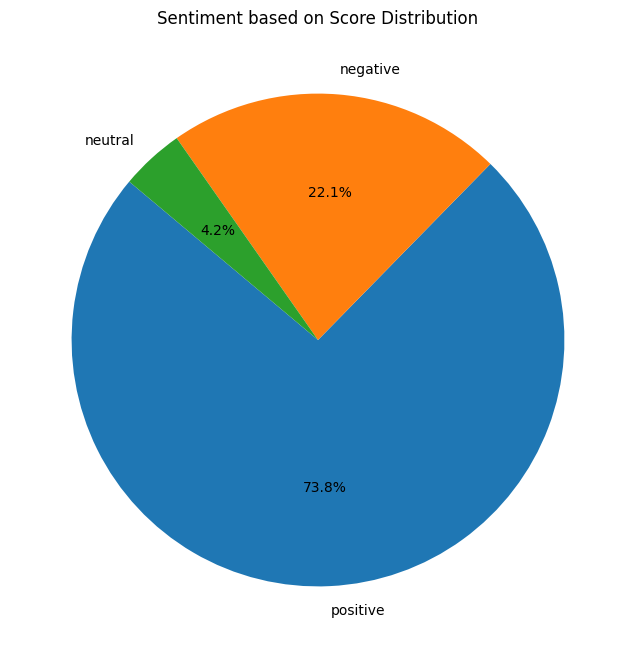

In [ ]:
# Count the occurrences of each sentiment
sentiment_counts = df['sentation_based_on_score'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment based on Score Distribution')
plt.show()

In [ ]:
df.score.describe()

,score
count,1800.000000
mean,3.978889
std,1.586351
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df.replyContent[df['replyContent'].notna()]

,replyContent
246,Thank you for your feedback. Your valuable inp...
326,Hi Blaster! We’re sorry the recent changes did...
355,Hi Blaster! We're sorry that we didn't deliver...
365,"Hi Blaster! We’re glad you enjoy the game, but..."
371,Hello Blaster! Apologies for the poor experien...
...,...
1579,Hi! We are sorry you didn't find the game ente...
1584,Hello! We are really sorry you are not satisfi...
1590,Hi! We are very sorry you were not satisfied w...
1597,Hello. Thank you for leaving a comment about t...


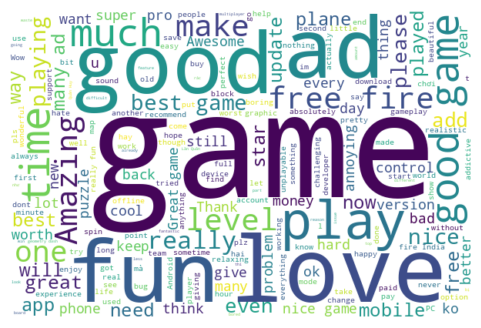

In [11]:
review = df['content']

# Combine all text in the 'content' column
text = ' '.join(review.astype(str))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["amp"])

# Create and configure the word cloud
wordcloud = WordCloud(width=600, height=400, stopwords=stopwords, background_color='white', max_words=200).generate(text)

# Display the word cloud
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.t\itle('Word Cloud of Reviews before preprocess')
plt.savefig('wordcloud_before.png')
plt.show()
plt.close()

In [12]:
all_words = []
for line in list(review): #Divide string to single words
    words = line.split()
    for word in words:
        all_words.append(word.lower())

collections.Counter(all_words).most_common(10)#In ra 10 từ phổ biến nhất

[('game', 1037),
 ('the', 955),
 ('i', 919),
 ('and', 691),
 ('it', 592),
 ('this', 561),
 ('to', 551),
 ('is', 540),
 ('a', 423),
 ('but', 351)]

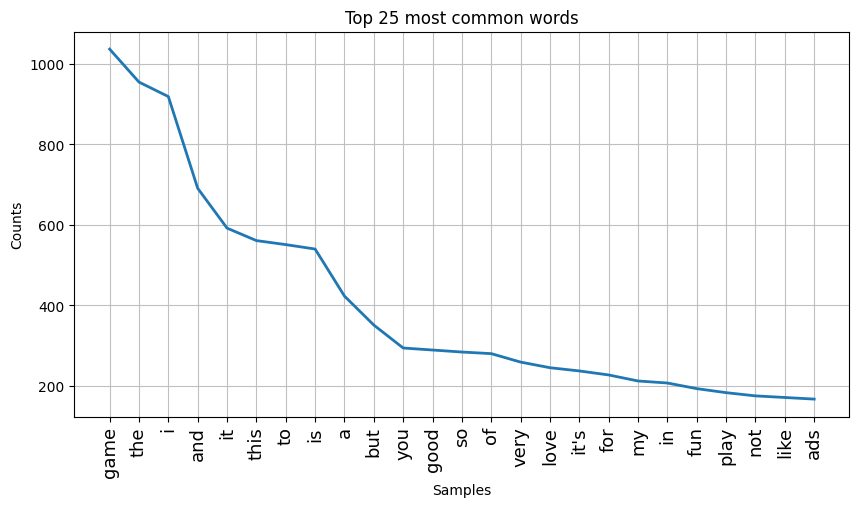

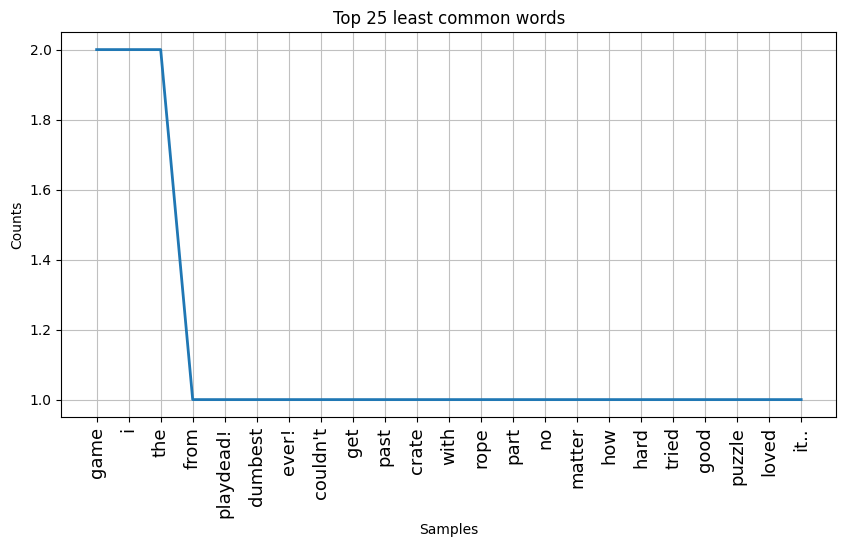

<Axes: title={'center': 'Top 25 least common words'}, xlabel='Samples', ylabel='Counts'>

In [13]:
# plot word frequency distribution of most common words
plt.figure(figsize=(10,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)


# plot word frequency distribution of least common words
plt.figure(figsize=(10,5))
plt.title('Top 25 least common words')
plt.xticks(fontsize=13, rotation=45)
fd = nltk.FreqDist(all_words[-26:])
fd.plot(cumulative=False)

#Preprocess

In [14]:
review = df['content']
review

,content
0,this game is good and cool I gave it five star
1,This is the best game like im serioues best ap...
2,fghhhhhyy hai kya tum mere sath date 📅📅📅 hai h...
3,"Too much ads, good game but too much ads ruine..."
4,Humble is not a secret
...,...
2395,Amazing
2396,"Sad but you'll want to play it through, remini..."
2397,DUMBEST GAME EVER! I COULDN'T GET PAST THE CRA...
2398,Good puzzle game


In [15]:
def expand_contractions(text):
    # Expand contractions in the text
    expanded_text = contractions.fix(text)
    return expanded_text

In [ ]:
print(expand_contractions("isn't, Doesn't; didn't; this's; i've; i ain't; she's; they're; i'll "))

is not, Does not; did not; this is; i have; i are not; she is; they are; i will 


In [16]:
# Split text using wordninja to handle conjoined words
def split_conjoined_words(text):
    tokens = text.split()  # First split by spaces to get tokens
    split_tokens = []

    for token in tokens:
        # If the token is an emoji (i.e., it has colons around it), split the emoji name
        if token.startswith(':') and token.endswith(':'):
            # Remove colons and split by underscore or space
            emoji_name = token.replace('_', ' ')  # Replace underscores with spaces
            split_tokens.append(emoji_name)
        else:
          if len(token) > 20:  # Conjoined words tend to be long (adjust this threshold as needed)
              split_tokens.extend(wordninja.split(token)) # Use wordninja to split conjoined words
          else:
              split_tokens.append(token)

    return ' '.join(split_tokens)


In [17]:
review = df['content']
t = emoji.demojize(review[1], delimiters=(":", ":"))
print(t, end='\n\n')
t = split_conjoined_words(t)
print(t, end='\n\n')
pattern = f"[{re.escape(string.punctuation)}]"
t = re.sub(pattern, ' ', t)
print(t, end='\n\n')

This is the best game like im serioues best app get it noww

This is the best game like im serioues best app get it noww

This is the best game like im serioues best app get it noww



In [22]:
def data_processing(text):

    # Expand contractions
    # text = text.apply(lambda x: expand_contractions(x))
    text = expand_contractions(text)

    # Convert emojis to text
    text = emoji.demojize(text, delimiters=(":", ":"))

    # Convert text to lowercase
    text = text.lower()

    # Remove number
    text = re.sub(r'\d+', '', text)

    # Substitutes three or more consecutive occurrences of the same character with two
    # text = text.apply(lambda x:re.sub(r'(.)\1{2,}', r'\1\1', text))
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    # Split conjoined words
    text = split_conjoined_words(text)

    # Remove punctuation with space
    pattern = f"[{re.escape(string.punctuation)}]"
    text = re.sub(pattern, ' ', text)

    # Substitute the multiple spaces with single spaces
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # Tokenize the text into individual words using NLTK's word_tokenize function
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # tokens = word_tokenize(tokens)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the filtered words back into a single string and return
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [24]:
data_processing('😁 i were very excited keep going. the gaem was cooool!!')

'beaming face smiling eye excited keep going gaem cool'

In [25]:
clean_text = review.apply(lambda x: data_processing(x))

In [ ]:
clean_text

,content
0,game super
1,great thumb melting face winking face smiling ...
2,good though
3,fun smiling face smiling eye
4,awesome see game lot add
...,...
1795,update need
1796,masterpiece game soothing cozy lot never overw...
1797,fishing beyond frustrating worst aspect league...
1798,change time date like pc give already also clo...


##EDA after preprocess

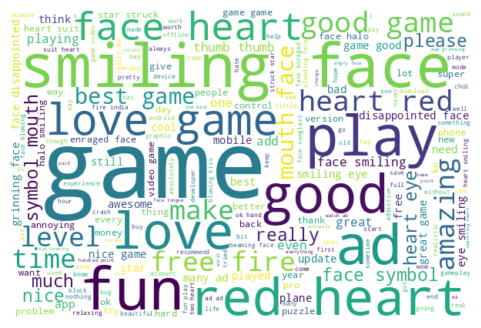

In [28]:
# Combine all text in the 'content' column
text = ' '.join(clean_text.astype(str))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["amp"])

# Create and configure the word cloud
wordcloud = WordCloud(width=600, height=400, stopwords=stopwords, background_color='white', max_words=200).generate(text)

# Display the word cloud
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.t\itle('Word Cloud of Reviews before preprocess')
plt.savefig('wordcloud_after.png')
plt.show()
plt.close()

In [29]:
all_words = []
for line in list(clean_text): #Divide string to single words
    words = line.split()
    for word in words:
        all_words.append(word.lower())

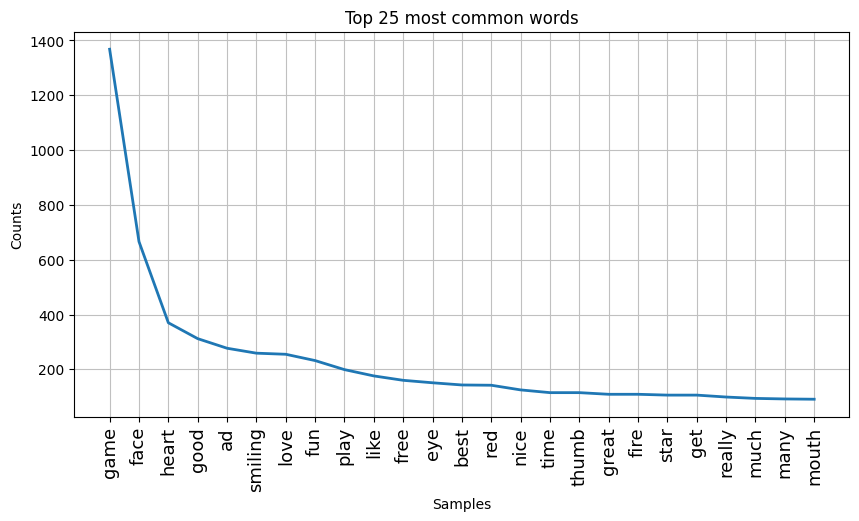

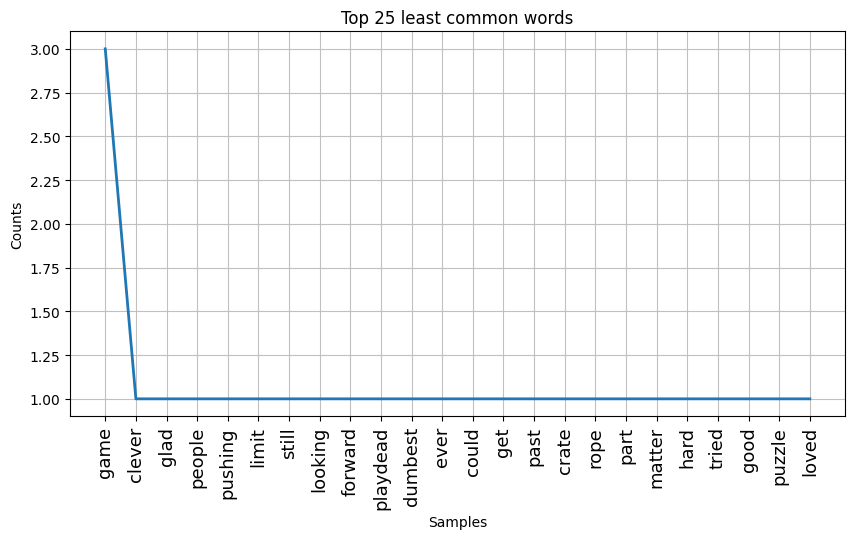

<Axes: title={'center': 'Top 25 least common words'}, xlabel='Samples', ylabel='Counts'>

In [30]:
# plot word frequency distribution of most common words
plt.figure(figsize=(10,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)


# plot word frequency distribution of least common words
plt.figure(figsize=(10,5))
plt.title('Top 25 least common words')
plt.xticks(fontsize=13, rotation=45)
fd = nltk.FreqDist(all_words[-26:])
fd.plot(cumulative=False)

#Lexicon-based

##TextBlob

In [33]:
# Create a new data frame
data = pd.DataFrame({'review': review, 'clean_text': clean_text})

In [34]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [35]:
def sentiment(label):
    if label <0:
        return "negative"
    elif label ==0:
        return "neutral"
    elif label>0:
        return "positive"

In [36]:
TextBlob_score = clean_text.apply(lambda x: polarity(x))

In [37]:
TextBlob_sentiment = TextBlob_score.apply(lambda x: sentiment(x))

In [38]:
TextBlob_sentiment

,content
0,positive
1,positive
2,positive
3,positive
4,negative
...,...
2395,positive
2396,negative
2397,negative
2398,positive


In [39]:
data['TextBlob_score'] = TextBlob_score
data['TextBlob_sentiment'] = TextBlob_sentiment

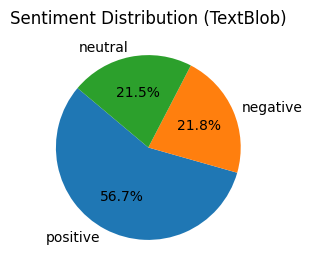

In [41]:
# Sentiment Distribution
sentiment_counts = data['TextBlob_sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(3, 3))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution (TextBlob)')
plt.savefig('TextBlob_pie.png')
plt.show()

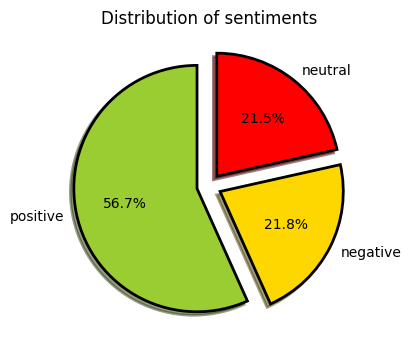

In [42]:
fig = plt.figure(figsize=(4,4))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = data['TextBlob_sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')
plt.show()

##VADER

In [ ]:
# analyzer = SentimentIntensityAnalyzer()
# vs = analyzer.polarity_scores(data['clean_text'])
# print(vs)
# print("{:-<65} {}".format("this game ain't that good", str(vs)))

In [45]:
sid = SentimentIntensityAnalyzer()

# Apply polarity scores to 'clean_text' column and store the results in 'Vader_score'
data['Vader_score'] = data['clean_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Categorize sentiment based on 'compound_score' using pd.cut
data['Vader_sentiment'] = pd.cut(data['Vader_score'], bins=[-1, -0.1, 0.1, 1], labels=['negative', 'neutral', 'positive'])


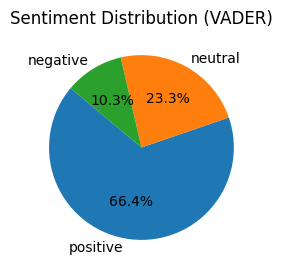

In [48]:
# Pie chart
sentiment_counts = data['Vader_sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(3, 3))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution (VADER)')
plt.savefig('VADER_pie.png')
plt.show()

##SentiWordNet

In [51]:
def analyze_sentiment_sentiwordnet(text):
  """Analyzes the sentiment of a given text using SentiWordNet."""
  tokens = nltk.word_tokenize(text)
  pos_score = 0
  neg_score = 0
  for token in tokens:
    synsets = list(swn.senti_synsets(token))
    if synsets:
      # Use the first synset as a representative sentiment
      synset = synsets[0]
      pos_score += synset.pos_score()
      neg_score += synset.neg_score()

  if pos_score > neg_score:
    return "positive"
  elif neg_score > pos_score:
    return "negative"
  else:
    return "neutral"


# Apply the function to the 'clean_text' column in your DataFrame
data['SentiWordNet_sentiment'] = data['clean_text'].apply(analyze_sentiment_sentiwordnet)



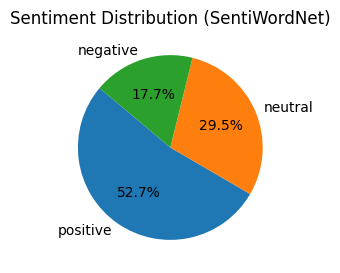

In [52]:
# Analyze the sentiment distribution using the 'SentiWordNet_sentiment' column
sentiment_counts = data['SentiWordNet_sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(3, 3))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution (SentiWordNet)')
plt.savefig('SentiWordNet_pie.png')
plt.show()

##Final Sentiment

In [53]:
data.head()

,review,clean_text,TextBlob_score,TextBlob_sentiment,Vader_score,Vader_sentiment,SentiWordNet_sentiment
0,this game is good and cool I gave it five star,game good cool gave five star,0.216667,positive,0.6369,positive,positive
1,This is the best game like im serioues best ap...,best game like serioues best app get noww,0.533333,positive,0.8979,positive,positive
2,fghhhhhyy hai kya tum mere sath date 📅📅📅 hai h...,fghhyy hai kya tum mere sath date calendar cal...,0.050000,positive,0.7096,positive,neutral
3,"Too much ads, good game but too much ads ruine...",much ad good game much ad ruined game play exp...,0.025000,positive,0.2960,positive,neutral
4,Humble is not a secret,humble secret,-0.300000,negative,0.0000,neutral,negative


In [54]:
def get_final_sentiment(row):
    sentiments = [row['TextBlob_sentiment'], row['Vader_sentiment'], row['SentiWordNet_sentiment']]

    # If any two tools agree, choose that sentiment
    for sentiment in set(sentiments):
        if sentiments.count(sentiment) >= 2:
            return sentiment

    # If all three tools disagree, choose VADER's sentiment
    return row['Vader_sentiment']

# Assuming your DataFrame is named 'data'
data['sentiment'] = data.apply(get_final_sentiment, axis=1)

# Display the first few rows of the updated DataFrame
print(data[['clean_text','TextBlob_sentiment', 'Vader_sentiment', 'SentiWordNet_sentiment', 'sentiment']].head())


                                          clean_text TextBlob_sentiment  \
0                      game good cool gave five star           positive   
1          best game like serioues best app get noww           positive   
2  fghhyy hai kya tum mere sath date calendar cal...           positive   
3  much ad good game much ad ruined game play exp...           positive   
4                                      humble secret           negative   

  Vader_sentiment SentiWordNet_sentiment sentiment  
0        positive               positive  positive  
1        positive               positive  positive  
2        positive                neutral  positive  
3        positive                neutral  positive  
4         neutral               negative  negative  


In [55]:
data.to_csv('data.csv', index=False)  # Save to a CSV file named 'data.csv'

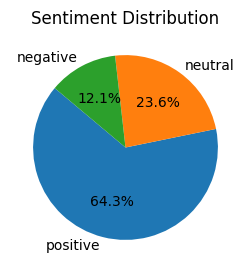

In [57]:
# Analyze the sentiment distribution using the 'SentiWordNet_sentiment' column
sentiment_counts = data['sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(3, 3))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.savefig('Sentiment_pie.png')
plt.show()

#Split data set

In [58]:
data = data[['review','clean_text','sentiment']]
data.columns

Index(['review', 'clean_text', 'sentiment'], dtype='object')

In [59]:
#Split data frame data into train set, test set, validation set with radio of 7:2:1

from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'data'
train, temp = train_test_split(data, test_size=0.3, random_state=42)  # Split into 70% train and 30% temp
valid, test = train_test_split(temp, test_size=2/3, random_state=42)  # Split temp into 10% validation and 20% test

print(f"Train set size: {len(train)}")
print(f"Validation set size: {len(valid)}")
print(f"Test set size: {len(test)}")

Train set size: 1680
Validation set size: 240
Test set size: 480


In [65]:
# Save train, test, and validation sets to CSV files
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)
valid.to_csv('valid.csv', index=False)